In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('crime_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<Axes: >

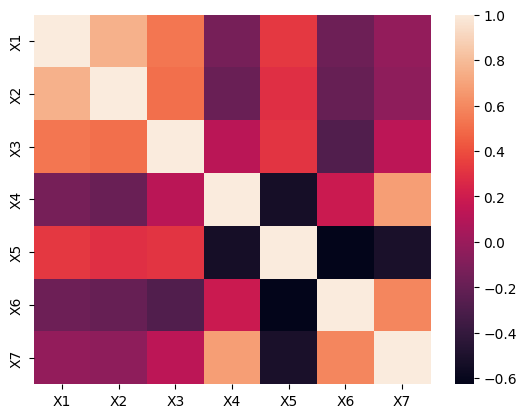

In [7]:
sns.heatmap(df.corr())

In [10]:
x = df[['X2','X5']]
y = df['X1']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=32)

In [13]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred = regression.predict(x_test)
y_pred

array([1150.14172271,  480.45104191,  818.19106585, 1227.55813262,
        793.59725046,  412.11636809,  952.72799954,  460.13293182,
        691.73054259,  632.98594097,  889.21046849,  563.51330147,
       2349.69377312,  943.34788205, 1017.92493373])

In [18]:
accuracy_score = regression.score(x_test,y_test)
accuracy_score

0.40491214090185057

In [19]:
regression.coef_

array([0.53032549, 5.18172689])

In [21]:
#y = .53032549X2 + 5.18172689X5

OLS regression

Ordinary Least Squares

is a type of linear regression that lets you handle 'features' with and without 'interactions'/correlation

In [23]:
from statsmodels.formula.api import ols

db_df = pd.read_csv('diabetes.csv')
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
db_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [34]:
db_vs_glucose = ols("Outcome ~ Glucose", data=db_df).fit()
print(db_vs_glucose.params)
intercept, slope = db_vs_glucose.params
#y = 006960glucose -0.492495

Intercept   -0.492495
Glucose      0.006960
dtype: float64


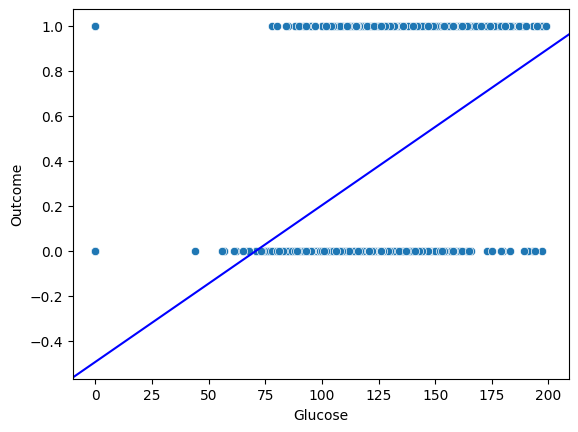

In [35]:
sns.scatterplot(x='Glucose',y='Outcome',data=db_df)

plt.axline(xy1=(0,intercept),slope=slope, color='b')

Using a continuous model on a discrete dataset

but we can use logistic regression on dicrete data

In [39]:
age_glucose_no_interaction = ols("Outcome ~ Age + Glucose", data=db_df).fit()
print(age_glucose_no_interaction.params)
intercept, Age, Glucose = age_glucose_no_interaction.params

Intercept   -0.600748
Age          0.005030
Glucose      0.006473
dtype: float64


In [40]:
age_glucose_with_interaction = ols("Outcome ~ Age * Glucose", data=db_df).fit()